# Simulation Func for Regression 

In [3]:
import pandas as pd
import numpy as np
import lifelines as ll
import sksurv as sks
import matplotlib.pyplot as plt
from bart_survival import surv_bart as sb
# from bart_survival import simulation as sm
import lifelines as ll
from lifelines import KaplanMeierFitter
import subprocess
import importlib

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
import sys
sys.path.append("../py/")
sys.path.append("../src/")
import _conditions1 as cn
import _functions1 as fn
import _sim_iter1 as si
import _plot_fx as pltf
import sim_adj as sm

In [5]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 9, 
    "VAR_CLASS": [2,2,2,2,2,2,2,2,2],
    "VAR_PROB":[.5,.5,.5,.5,.5,.5,.5,.5,.5],
    # "scale_f": "2.5*x_mat[:,0]",
    "scale_f": "np.exp(3 + 0.1*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5]) + x_mat[:,6])",
    "shape_f": "2",
    "cens_scale":3.5
}

In [5]:
cens_perc = []
for i in range(1000):
    rng = np.random.default_rng(i)
    x_mat = sm.get_x_matrix(
        N = 400, 
        x_vars = reg_1["x_vars"], 
        VAR_CLASS=reg_1["VAR_CLASS"],
        VAR_PROB=reg_1["VAR_PROB"],
        rng=rng
        )
    event, sv_true, sv_scale_true = sm.simulate_survival(
        x_mat = x_mat,
        scale_f=reg_1["scale_f"],
        shape_f=reg_1["shape_f"],
        cens_scale = reg_1["cens_scale"],
        rng=rng
    )

    cens_perc.append( event["status"][event["status"] == 0].shape[0]/event["status"].shape[0])
    
np.mean(cens_perc)

mean shape 2.18625
mean scale 10.434000000000001
33.0
mean time draws 9.489652293965849
cens mean 0.0
mean shape 2.2875
mean scale 10.38
33.0
mean time draws 9.704193588664625
cens mean 0.0
mean shape 2.27625
mean scale 10.386
33.0
mean time draws 9.526429798858276
cens mean 0.0
mean shape 2.21625
mean scale 10.418
33.0
mean time draws 9.70417544477244
cens mean 0.0
mean shape 2.16
mean scale 10.448000000000002
33.0
mean time draws 9.76277137635537
cens mean 0.0
mean shape 2.28375
mean scale 10.381999999999998
33.0
mean time draws 8.861429555807959
cens mean 0.0
mean shape 2.22375
mean scale 10.414000000000001
33.0
mean time draws 8.777764446950359
cens mean 0.0
mean shape 2.2125
mean scale 10.42
33.0
mean time draws 9.24107667883344
cens mean 0.0
mean shape 2.28375
mean scale 10.382
33.0
mean time draws 9.167965741547285
cens mean 0.0
mean shape 2.21625
mean scale 10.418
33.0
mean time draws 9.13191614794481
cens mean 0.0
mean shape 2.26875
mean scale 10.39
33.0
mean time draws 9.3070

1.0

In [6]:
# for params
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 3, 
    "VAR_CLASS": [2],
    "VAR_PROB":[.5],
    # "scale_f": "2.5*x_mat[:,0]",
    "scale_f": "10 + 0.8*x_mat[:,0]",
    "shape_f": "3 - 1.5 * x_mat[:,0]",
    "cens_scale":None
}

In [7]:
cens_perc = []
# for i in range(1000):
rng = np.random.default_rng(99)
x_mat = sm.get_x_matrix(
	N = 400, 
	x_vars = reg_1["x_vars"], 
	VAR_CLASS=reg_1["VAR_CLASS"],
	VAR_PROB=reg_1["VAR_PROB"],
	rng=rng
	)
event, sv_true, sv_scale_true = sm.simulate_survival(
	x_mat = x_mat,
	scale_f=reg_1["scale_f"],
	shape_f=reg_1["shape_f"],
	cens_scale = reg_1["cens_scale"],
	rng=rng
)

cens_perc.append( event["status"][event["status"] == 0].shape[0]/event["status"].shape[0])

# np.mean(cens_perc)

mean shape 2.19
mean scale 10.431999999999999
33.0
mean time draws 9.016970445438238
cens mean 0.0


In [10]:
event["status"]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

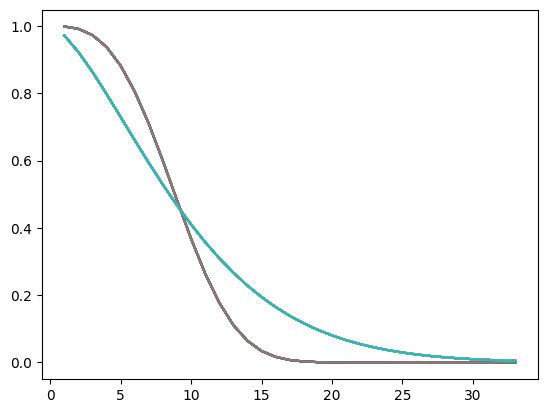

In [8]:

sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
pb = sv_true["hz_true"]
for i in range(40):
    plt.plot(ttt, sv[i,:])
    # plt.plot(ttt, pb[i,:])

# plt.xlim(0,120)

In [47]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 9, 
    "VAR_CLASS": [2,2,2,2,2,2,2,2,2],
    "VAR_PROB":[.5,.5,.5,.5,.5,.5,.5,.5,.5],
    "scale_f": "20 + 5*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5] + 10*x_mat[:,6])",
    "shape_f": "0.7 + 1.3*x_mat[:,6]",
    "cens_scale":3.7
}

In [43]:
rng = np.random.default_rng(99)
x_mat = sm.get_x_matrix(
    N = 400, 
    x_vars = reg_1["x_vars"], 
    VAR_CLASS=reg_1["VAR_CLASS"],
    VAR_PROB=reg_1["VAR_PROB"],
    rng=rng
    )
event, sv_true, sv_scale_true = sm.simulate_survival(
    x_mat = x_mat,
    scale_f=reg_1["scale_f"],
    shape_f=reg_1["shape_f"],
    rng=rng
)


mean shape 1.402
mean scale 62.6375
mean time draws 59.562302359128736


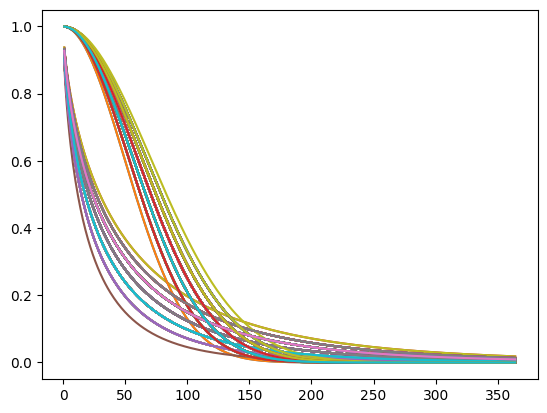

In [45]:
sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
for i in range(400):
    plt.plot(ttt, sv[i,:])

# Complex Regression

In [1]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 10, 
    "VAR_CLASS": [1,1,1,1,1,1,1,1,1,1],
    "VAR_PROB":[None,None,None,None,None,None,None,None,None,None],
    "scale_f" : "np.exp(3 + 0.5*np.sin(np.pi * x_mat[:,0] * x_mat[:,1]) + np.power((x_mat[:,2]-0.5), 2) + 0.5* x_mat[:,3] + 0.25 * x_mat[:,4])",
    # "scale_f": "20 + 5*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5] + 10*x_mat[:,6])",
    "shape_f": "2",
    "cens_scale":3.7
}

In [1]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 10, 
    "VAR_CLASS": [1,1,1,1,1,1,1,1,1,1],
    "VAR_PROB":[None,None,None,None,None,None,None,None,None,None],
    "scale_f" : "np.exp(3 + 0.5*np.sin(np.pi * x_mat[:,0] * x_mat[:,1]) + np.power((x_mat[:,2]-0.5), 2) + 0.5* x_mat[:,3] + 0.25 * x_mat[:,4])",
    # "scale_f": "20 + 5*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5] + 10*x_mat[:,6])",
    "shape_f": "2",
    "cens_scale":3.7
}

In [2]:
rng = np.random.default_rng(99)
x_mat = sm.get_x_matrix(
    N = 400, 
    x_vars = reg_1["x_vars"], 
    VAR_CLASS=reg_1["VAR_CLASS"],
    VAR_PROB=reg_1["VAR_PROB"],
    rng=rng
    )
event, sv_true, sv_scale_true = sm.simulate_survival(
    x_mat = x_mat,
    scale_f=reg_1["scale_f"],
    shape_f=reg_1["shape_f"],
    rng=rng
)

NameError: name 'np' is not defined

In [14]:
print(np.unique(x_mat, axis=0))
x_mat

[[0.    0.731 0.475 ... 0.374 0.233 0.983]
 [0.005 0.035 0.827 ... 0.72  0.768 0.844]
 [0.011 0.449 0.15  ... 0.054 0.962 0.756]
 ...
 [0.997 0.43  0.584 ... 0.326 0.786 0.83 ]
 [0.997 0.93  0.9   ... 0.128 0.531 0.977]
 [1.    0.096 0.16  ... 0.981 0.906 0.526]]


array([[0.506, 0.103, 0.271, ..., 0.767, 0.87 , 0.562],
       [0.565, 0.544, 0.275, ..., 0.468, 0.246, 0.742],
       [0.512, 0.177, 0.098, ..., 0.279, 0.48 , 0.363],
       ...,
       [0.216, 0.555, 0.087, ..., 0.663, 0.601, 0.822],
       [0.712, 0.909, 0.864, ..., 0.704, 0.646, 0.516],
       [0.799, 0.147, 0.038, ..., 0.928, 0.589, 0.407]])

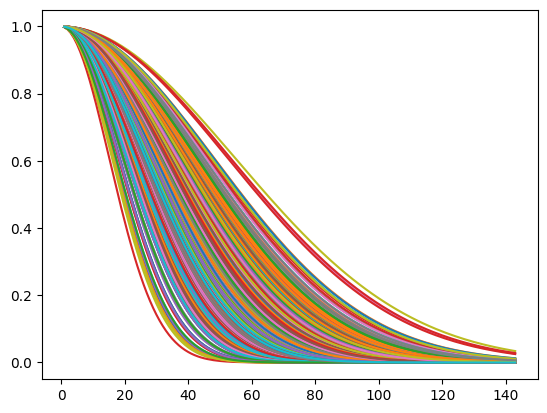

In [52]:
sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
for i in range(400):
    plt.plot(ttt, sv[i,:])